In [1]:
!pip install gdown
import gdown
!gdown --id 1bS3Tnk73namGTGiaDW5b4m8IvD83ZlyK


Access denied with the following error:


D:\APP\anaconda\envs\torch_env\Lib\site-packages\gdown\cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1bS3Tnk73namGTGiaDW5b4m8IvD83ZlyK 



In [2]:
!unzip train.zip -d data/fugc

Archive:  train.zip
   creating: data/fugc/train/
  inflating: data/fugc/train/Data-sharing Agreement_FUGC2025.docx  
   creating: data/fugc/train/labeled_data/
   creating: data/fugc/train/labeled_data/images/
  inflating: data/fugc/train/labeled_data/images/0001.png  
  inflating: data/fugc/train/labeled_data/images/0002.png  
  inflating: data/fugc/train/labeled_data/images/0003.png  
  inflating: data/fugc/train/labeled_data/images/0004.png  
  inflating: data/fugc/train/labeled_data/images/0005.png  
  inflating: data/fugc/train/labeled_data/images/0006.png  
  inflating: data/fugc/train/labeled_data/images/0007.png  
  inflating: data/fugc/train/labeled_data/images/0008.png  
  inflating: data/fugc/train/labeled_data/images/0009.png  
  inflating: data/fugc/train/labeled_data/images/0010.png  
  inflating: data/fugc/train/labeled_data/images/0011.png  
  inflating: data/fugc/train/labeled_data/images/0012.png  
  inflating: data/fugc/train/labeled_data/images/0013.png  
  inflati

In [3]:
import os
import numpy as np
import random
import cv2
import matplotlib.pyplot as plt

def create_folds(proceeded_folder='./proceeded_data', num_folds=5):
    folds_dir = proceeded_folder
    os.makedirs(folds_dir, exist_ok=True)

    image_files = os.listdir(os.path.join(proceeded_folder, 'images'))
    label_files = os.listdir(os.path.join(proceeded_folder, 'labels'))

    assert all(img[:-4] == lbl[:-4] for img, lbl in zip(sorted(image_files), sorted(label_files))), "Image and label names do not match."

    file_names = [img[:-4] for img in image_files]

    random.shuffle(file_names)

    folds = np.array_split(file_names, num_folds)

    for i in range(num_folds):
        with open(os.path.join(folds_dir, f'fold_label_{i + 1}.txt'), 'w') as f:
            for name in folds[i]:
                f.write(f"{name}.npy\n")
                
def save_images_and_labels_as_npy(images_dirs, labels_dirs, output_npy_dir):
    for dataset_name, image_dir, label_dir in zip(['fugc'], images_dirs, labels_dirs):
        dataset_image_dir = os.path.join(output_npy_dir, dataset_name, 'train', 'labeled_data', 'images')
        dataset_label_dir = os.path.join(output_npy_dir, dataset_name, 'train', 'labeled_data', 'labels')
        
        os.makedirs(dataset_image_dir, exist_ok=True)
        os.makedirs(dataset_label_dir, exist_ok=True)

        for root, dirs, files in os.walk(image_dir):
            for file in files:
                if file.endswith('.png'):
                    image_path = os.path.join(root, file)
                    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                    if image is not None:
                        image_npy_path = os.path.join(dataset_image_dir, f"{os.path.splitext(file)[0]}.npy")
                        np.save(image_npy_path, image)
                        print(f"Saved image to {image_npy_path}.")
                    else:
                        print(f"Warning: Could not read image at {image_path}.")

                    # Similarly for labels
                    label_path = os.path.join(label_dir, file)  # Assume labels have same filename
                    if os.path.exists(label_path):
                        label = cv2.imread(label_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
                        if label is not None:
                            label_npy_path = os.path.join(dataset_label_dir, f"{os.path.splitext(file)[0]}.npy")
                            np.save(label_npy_path, label)
                            print(f"Saved label to {label_npy_path}.")
                        else:
                            print(f"Warning: Could not read label at {label_path}.")
                    else:
                        print(f"Warning: Label not found for {file}.")

def save_unlabeled_images_as_npy(unlabeled_dirs, output_npy_dir):
    for dataset_name, unlabeled_dir in zip(['fugc'], unlabeled_dirs):
        dataset_unlabeled_dir = os.path.join(output_npy_dir, dataset_name, 'train', 'unlabeled_data', 'images')
        os.makedirs(dataset_unlabeled_dir, exist_ok=True)

        # Create unlabeled.txt file
        unlabeled_txt_path = os.path.join(output_npy_dir, dataset_name, 'train', 'unlabeled_data', 'unlabeled.txt')
        os.makedirs(os.path.dirname(unlabeled_txt_path), exist_ok=True)
        unlabeled_files = []

        for root, dirs, files in os.walk(unlabeled_dir):
            for file in files:
                if file.endswith('.png'):
                    image_path = os.path.join(root, file)
                    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                    if image is not None:
                        image_npy_path = os.path.join(dataset_unlabeled_dir, f"{os.path.splitext(file)[0]}.npy")
                        np.save(image_npy_path, image)
                        print(f"Saved unlabeled image to {image_npy_path}.")
                        unlabeled_files.append(f"{os.path.splitext(file)[0]}.npy")
                    else:
                        print(f"Warning: Could not read unlabeled image at {image_path}.")

        # Write unlabeled file names to unlabeled.txt
        with open(unlabeled_txt_path, 'w') as f:
            for file in unlabeled_files:
                f.write(f"{file}\n")

images_dirs = 'data/fugc/train/labeled_data/images'
labels_dirs = 'data/fugc/train/labeled_data/labels'
unlabeled_dirs = 'data/fugc/train/unlabeled_data/images'

print("Images directory content:", os.listdir(images_dirs))
print("Labels directory content:", os.listdir(labels_dirs))

train_images_dirs = [
    'data/fugc/train/labeled_data/images',    
]

train_labels_dirs = [
    'data/fugc/train/labeled_data/labels',
]

unlabeled_images_dirs = [
    'data/fugc/train/unlabeled_data/images',
]

output_npy_dir = 'data_processed'
    
save_images_and_labels_as_npy(train_images_dirs, train_labels_dirs, output_npy_dir)
save_unlabeled_images_as_npy(unlabeled_images_dirs, output_npy_dir)

# Create folds after saving the data
create_folds(os.path.join(output_npy_dir, 'fugc', 'train', 'labeled_data'), num_folds=5)


Images directory content: ['0001.png', '0002.png', '0003.png', '0004.png', '0005.png', '0006.png', '0007.png', '0008.png', '0009.png', '0010.png', '0011.png', '0012.png', '0013.png', '0014.png', '0015.png', '0016.png', '0017.png', '0018.png', '0019.png', '0020.png', '0021.png', '0022.png', '0023.png', '0024.png', '0025.png', '0026.png', '0027.png', '0028.png', '0029.png', '0030.png', '0031.png', '0032.png', '0033.png', '0034.png', '0035.png', '0036.png', '0037.png', '0038.png', '0039.png', '0040.png', '0041.png', '0042.png', '0043.png', '0044.png', '0045.png', '0046.png', '0047.png', '0048.png', '0049.png', '0050.png']
Labels directory content: ['0001.png', '0002.png', '0003.png', '0004.png', '0005.png', '0006.png', '0007.png', '0008.png', '0009.png', '0010.png', '0011.png', '0012.png', '0013.png', '0014.png', '0015.png', '0016.png', '0017.png', '0018.png', '0019.png', '0020.png', '0021.png', '0022.png', '0023.png', '0024.png', '0025.png', '0026.png', '0027.png', '0028.png', '0029.png'

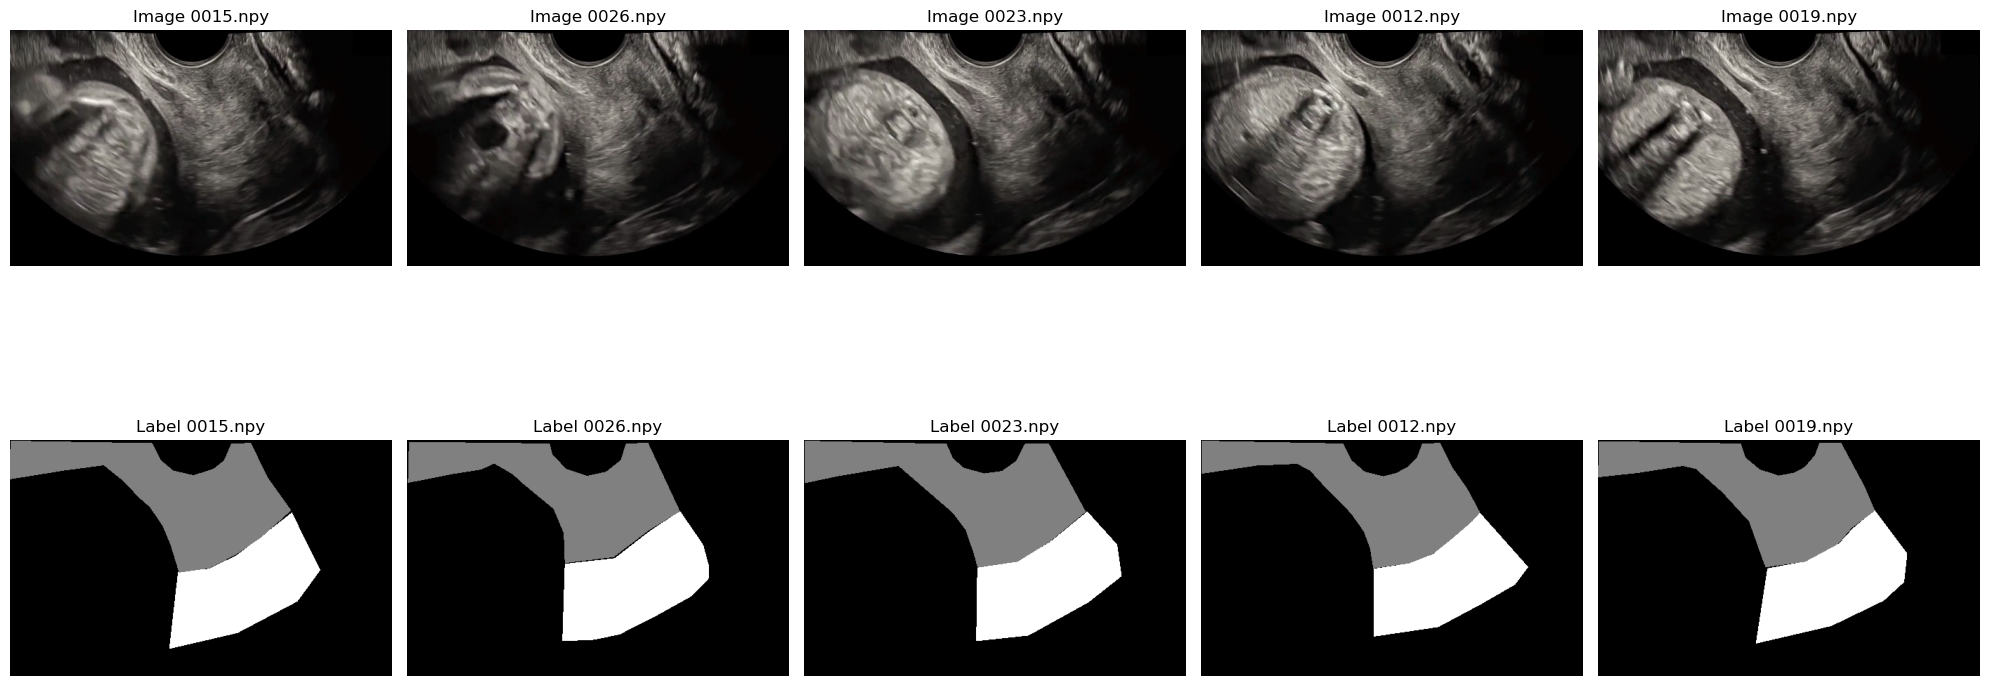

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
# show images and labels
dataset_name = 'fugc'
fold = 1

def show_images_and_labels(dataset_name, fold):
    dataset_image_dir = '/home/student02/hieu/Projects/SSSS/data_processed/fugc/train/labeled_data/images/'
    dataset_label_dir = '/home/student02/hieu/Projects/SSSS/data_processed/fugc/train/labeled_data/labels/'
    
    image_files = os.listdir(dataset_image_dir)
    label_files = os.listdir(dataset_label_dir)
    
    # Randomly select 5 images
    random_indices = np.random.choice(len(image_files), 5, replace=False)
    selected_image_files = [image_files[i] for i in random_indices]
    selected_label_files = [label_files[i] for i in random_indices]
    
    plt.figure(figsize=(20,10))
    for i, (image_file, label_file) in enumerate(zip(selected_image_files, selected_label_files)):
        image = np.load(os.path.join(dataset_image_dir, image_file))
        label = np.load(os.path.join(dataset_label_dir, label_file))
        
        plt.subplot(2, 5, i+1)
        plt.imshow(image)
        plt.title(f'Image {image_file}')
        plt.axis('off')
        
        plt.subplot(2, 5, i+6)
        plt.imshow(label, cmap='gray')
        plt.title(f'Label {label_file}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

show_images_and_labels(dataset_name, fold)